# Data Classification

In [163]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# ToolKit

In [164]:
def loadexcel(x):#, #y = 'Sheet1'):
    run = True
    file= pd.ExcelFile(x)
    names = file.sheet_names
    names = re.sub("'",'', str(names))
    print ("This file contains this tab names:", names )
    while run is True:
        try:
            decision = (input("Choose your tab name? "))
            print ("Your choice is", decision)
            confirm = int(input("This is correct? Please write 1 for yes or 2 for no "))
            if confirm == 1:
                print ("Processing Tab, please wait")
                final_file = file.parse(decision)
                return final_file
                run = False
            else:
                print ('Choose the right tab!') 
        except Exception as e:
            print ("There is an error: ", e)
            print ("Please Try Again! :)")
            continue
            
def loading_excel():
    x = input('\033[94m'+'Please write your file location: ' +'\033[0m')
    real_x = path.realpath(x)
    doc = loadexcel(real_x) 
    return doc

In [165]:
def mergefield(x, jo=""):
    bold = "\033[1m"
    end =  "\033[0m"
    GREEN = '\033[92m'
    i=-1
    names = list(x)
    b = dict(enumerate(names))
    print ("This file contains this columns:" )
    for name in names:
        i=i+1
        print(str(i)+"."+" "+ name)
    print (bold+GREEN+"Choose the columns you want to merge."+end)
    election = input().split(",")
    item = list(map(int, election))
    convert = [b[y] for y in item]
    print("Your Choice is", convert)
    stripped = x[convert].fillna('').apply(lambda x: x.str.strip())
    join_symb = jo
    stripped = stripped.astype(str).apply(join_symb.join, axis=1)
    return stripped

In [166]:
def filtersame(x,y):  
    words_equal = []
    for word in x:
        if word in y:
            words_equal += [word]
    return words_equal

def removequal(x,y):  
    words_dif = []
    for word in y:
        if word not in x:
            words_dif += [word]
    return words_dif

In [167]:
from nltk.corpus import stopwords #create a variable to delete common words

def stopwords_list( lan ='spanish'):
    lan = str(lan)
    stopwords_es = stopwords.words(lan)
    stop_es = pd.DataFrame(stopwords_es)
    stop_es.columns =['StopWords']
    es_pal = '\\b'+stop_es['StopWords'].str.lower().astype(str)+'\\b'
    es_pal = es_pal.tolist()
    return es_pal

## Loading Clean Historical DB

### Necessary Libraries

In [168]:
from os import path
import pandas as pd
import re #regex
from nltk.stem.lancaster import LancasterStemmer

### Loading Files

In [169]:
#C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB Historical Peru.xlsx
db_hist = loading_excel() #Modelo
db_hist.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB Historical Peru.xlsx
This file contains this tab names: [Sheet1]
Choose your tab name? Sheet1
Your choice is Sheet1
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Timescale,DESCRIPCION COMERCIAL 1,NOMBRE COMERCIAL,MARCA,MODELO,CARACTERISTICAS,Processed,Vendor,Product,Model Name,CPU Type,New Vendor,Unnamed: 12
0,2018Q1,RAID SHIELD RAID SHIELD S/M,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
1,2018Q1,"AGUA DE COCO, SIGMA ALDRICH, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
2,2018Q1,SERVIDOR DE COMPUTO DELL R530,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
3,2018Q1,"REFRIGERADOR, ARCTIKO, PR1400",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
4,2018Q1,"ENZIMAS DE LABORATORIO, NEW ENGLAND BIOLABS, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
working_db = db_hist.copy()
working_db['DESCRIPCION COMERCIAL 1'] = working_db['DESCRIPCION COMERCIAL 1'].str.replace(r"^(\W+)","",case=False)
working_db['DESCRIPCION COMERCIAL 1'] = working_db['DESCRIPCION COMERCIAL 1'].str.replace(r"\, \,",", ",case=False)
#//
#working_db[['Descripcion', 'Marca','Modelo']] = working_db['DESCRIPCION COMERCIAL 1'].str.split(',', 2, expand=True)
working_db.iloc[30690]

Timescale                                                      2017Q4
DESCRIPCION COMERCIAL 1    UNIDAD DE PROCESO DIGITAL, LENOVO, S28600 
NOMBRE COMERCIAL                         ,,UNIDAD DE PROCESO DIGITAL 
MARCA                                                        ,LENOVO 
MODELO                                                        S28600 
CARACTERISTICAS                Desktop TC M710q I56400T 8G 1TB W10DG 
Processed                                                       Trash
Vendor                                                            NaN
Product                                                           NaN
Model Name                                                        NaN
CPU Type                                                          NaN
New Vendor                                                        NaN
Unnamed: 12                                                       NaN
Name: 30690, dtype: object

In [171]:
sans_comma = working_db[~working_db['DESCRIPCION COMERCIAL 1'].str.contains('(\w)+(,)')]

In [172]:
'''import datetime
trash_out = r'C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB_Revision' 
save = datetime.datetime.now().strftime("%y_%m_%d")
dir = trash_out +"_"+str(save)+".xlsx"
print(dir)

writer = pd.ExcelWriter(dir, engine='xlsxwriter')

#Convert the dataframe to an XlsxWriter Excel object.
working_db.to_excel(writer, sheet_name='Final Database')
sans_comma.to_excel(writer, sheet_name='Sin Coma')
# Close the Pandas Excel writer and output the Excel file.
writer.save()
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 32-33: truncated \UXXXXXXXX escape (<ipython-input-172-3399c1be745c>, line 14)

In [174]:
#working_db[working_db['DESCRIPCION COMERCIAL 1']=='TABLETS']
working_db['Working'] = mergefield(working_db, jo=" ") #1,5
working_db['Working'] = working_db['Working'].str.replace(r"\W"," ",case=False)
working_db['Working'] = working_db['Working'].str.replace(r" +"," ",case=False)
working_db.head()

This file contains this columns:
0. Timescale
1. DESCRIPCION COMERCIAL 1
2. NOMBRE COMERCIAL
3. MARCA
4. MODELO
5. CARACTERISTICAS
6. Processed
7. Vendor
8. Product
9. Model Name
10. CPU Type
11. New Vendor
12. Unnamed: 12
Choose the columns you want to merge.
1,5
Your Choice is ['DESCRIPCION COMERCIAL 1', 'CARACTERISTICAS']


,Timescale,DESCRIPCION COMERCIAL 1,NOMBRE COMERCIAL,MARCA,MODELO,CARACTERISTICAS,Processed,Vendor,Product,Model Name,CPU Type,New Vendor,Unnamed: 12,Working
0,2018Q1,RAID SHIELD RAID SHIELD S/M,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,RAID SHIELD RAID SHIELD S M
1,2018Q1,"AGUA DE COCO, SIGMA ALDRICH, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,AGUA DE COCO SIGMA ALDRICH S M
2,2018Q1,SERVIDOR DE COMPUTO DELL R530,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,SERVIDOR DE COMPUTO DELL R530
3,2018Q1,"REFRIGERADOR, ARCTIKO, PR1400",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,REFRIGERADOR ARCTIKO PR1400
4,2018Q1,"ENZIMAS DE LABORATORIO, NEW ENGLAND BIOLABS, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,ENZIMAS DE LABORATORIO NEW ENGLAND BIOLABS S M


In [175]:
working_db2 = working_db[['Timescale','Working','Processed']]
working_db2['Category Codes'] = working_db2['Processed'].astype('category').cat.codes
model_dict = working_db2[['Processed','Category Codes']].set_index('Category Codes')['Processed'].to_dict()
print(model_dict)
working_db2.head()

{1: 'Trash', 0: 'Model'}


,Timescale,Working,Processed,Category Codes
0,2018Q1,RAID SHIELD RAID SHIELD S M,Trash,1
1,2018Q1,AGUA DE COCO SIGMA ALDRICH S M,Trash,1
2,2018Q1,SERVIDOR DE COMPUTO DELL R530,Trash,1
3,2018Q1,REFRIGERADOR ARCTIKO PR1400,Trash,1
4,2018Q1,ENZIMAS DE LABORATORIO NEW ENGLAND BIOLABS S M,Trash,1


# Remove StopWords

In [176]:
esp_list= stopwords_list()
working_db2['Working'] = working_db2['Working'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
working_db2.head()

,Timescale,Working,Processed,Category Codes
0,2018Q1,RAID SHIELD RAID SHIELD S M,Trash,1
1,2018Q1,AGUA COCO SIGMA ALDRICH S M,Trash,1
2,2018Q1,SERVIDOR COMPUTO DELL R530,Trash,1
3,2018Q1,REFRIGERADOR ARCTIKO PR1400,Trash,1
4,2018Q1,ENZIMAS LABORATORIO NEW ENGLAND BIOLABS S M,Trash,1


# Stem Only Description

In [177]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stemmer.stem('cuando')

'cuand'

In [178]:
#db_hist_trash['Descripcion_Clean'] = db_hist_trash['Descripcion_Clean'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))

# Rearrange Database

In [179]:
import numpy as np
np.random.seed(0)
unique_db_org = working_db2.reset_index(drop=True)
df = unique_db_org.reindex(np.random.permutation(unique_db_org.index))
df.head()

,Timescale,Working,Processed,Category Codes
66273,2017Q2,TERMINAL PORTATIL TELEFON EKS FX2 4TVU EKS FX2...,Trash,1
44026,2017Q3,CONTROL UNIDAD INTELIGENTE HONDA S M,Trash,1
47588,2017Q3,TELEFONOS CELULARES SMOOTH STAR 4,Trash,1
64813,2017Q2,CELULAR MOTOROLA XT1681 MOTOROLA MOTO G5 PLUS ...,Trash,1
47741,2017Q3,TELEFONO CELULAR APPLE A1784,Trash,1


# Words contained

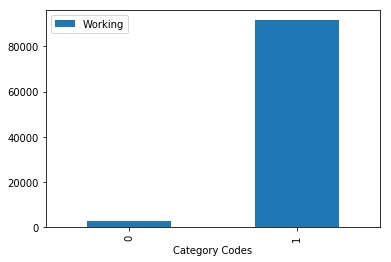

In [180]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df[['Working','Category Codes']].groupby('Category Codes').count().plot.bar(ylim=0)
plt.show()

# Scikit Learn Approach

In [181]:
df.head()

,Timescale,Working,Processed,Category Codes
66273,2017Q2,TERMINAL PORTATIL TELEFON EKS FX2 4TVU EKS FX2...,Trash,1
44026,2017Q3,CONTROL UNIDAD INTELIGENTE HONDA S M,Trash,1
47588,2017Q3,TELEFONOS CELULARES SMOOTH STAR 4,Trash,1
64813,2017Q2,CELULAR MOTOROLA XT1681 MOTOROLA MOTO G5 PLUS ...,Trash,1
47741,2017Q3,TELEFONO CELULAR APPLE A1784,Trash,1


# Splitting Databse

In [182]:
features = df['Working'].str.lower()
labels = df['Category Codes']

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

max(vect.get_feature_names(), key=lambda token:len(token))

'6splusspacegray32gbdemo'

In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


X_train_vectorized = vect.transform(X_train)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_vectorized, y_train)
predictions = clf.predict(vect.transform(X_test))


In [186]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

F1 Measure: 0.996
Precision: 0.996
F1 Measure: 0.996


In [187]:
result = pd.DataFrame(X_test)
result = result.reset_index(drop=True)
finalNB = result.join(pd.DataFrame(predictions, columns = (['Predictions Countvectorizer'])))
finalNB.head()

,Working,Predictions Countvectorizer
0,mouse maxell mowl 201 rasta ina,1
1,computadora asus x556ur xx003d por196ledsim,1
2,tarjeta madre lg s m cel,1
3,computadora lenovo thinkpad t470 porzzzzzzsim,1
4,telefono celular pack sony f3213 mobile phone,1


In [188]:
finalNB[finalNB['Predictions Countvectorizer']==0].head()

,Working,Predictions Countvectorizer
33,computadora samsung sm t380 tabzzzzzzzzz,0
79,tablet panasonic fz b2d200maa tablet,0
121,tablet etoway e99 tablet with accesories acces...,0
148,computadora disney tablet disney cars ta000vna...,0
177,tablet etoway e99 tablet with accesories acces...,0


# Tfidf Vectorizer

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [190]:
result = pd.DataFrame(X_test)
result = result.reset_index(drop=True)
print(len(result))
print(len(pd.DataFrame(predictions, columns = (['Predictions TFIDF']))))
finalTfidf = result.join(pd.DataFrame(predictions, columns = (['Predictions TFIDF'])))
finalTfidf.head()

23554
23554


,Working,Predictions TFIDF
0,mouse maxell mowl 201 rasta ina,1
1,computadora asus x556ur xx003d por196ledsim,1
2,tarjeta madre lg s m cel,1
3,computadora lenovo thinkpad t470 porzzzzzzsim,1
4,telefono celular pack sony f3213 mobile phone,1


In [191]:
from sklearn.svm import LinearSVC

vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

In [192]:
print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

F1 Measure: 0.998
Precision: 0.998
F1 Measure: 0.998


In [193]:
final_SVC = result.join(pd.DataFrame(predictions, columns = (['Predictions LinearSVC'])))
final_SVC.head()

,Working,Predictions LinearSVC
0,mouse maxell mowl 201 rasta ina,1
1,computadora asus x556ur xx003d por196ledsim,1
2,tarjeta madre lg s m cel,1
3,computadora lenovo thinkpad t470 porzzzzzzsim,1
4,telefono celular pack sony f3213 mobile phone,1


In [194]:
print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))



F1 Measure: 0.998
Precision: 0.998
F1 Measure: 0.998


In [195]:
names = ['Model','Trash']
#model_dict

In [196]:
from sklearn import metrics
print(metrics.classification_report(y_test.astype(int),predictions, target_names=names))

             precision    recall  f1-score   support

      Model       0.96      0.95      0.96       633
      Trash       1.00      1.00      1.00     22921

avg / total       1.00      1.00      1.00     23554



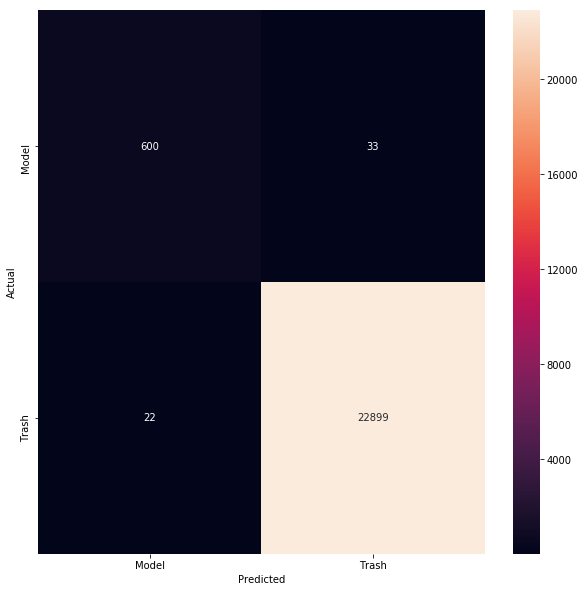

In [197]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test.astype(int),predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=names, yticklabels=names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Selection

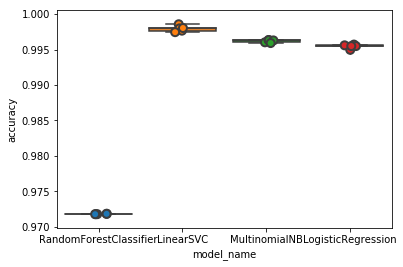

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, vect.transform(features), labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [199]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.997941
LogisticRegression        0.995447
MultinomialNB             0.996179
RandomForestClassifier    0.971788
Name: accuracy, dtype: float64

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    vect.transform(features), labels, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, target_names=names))
    print()

SyntaxError: invalid syntax (<ipython-input-200-e35ef6f6e7a9>, line 1)

# Final Classifier

In [201]:
#C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB Complete\Final Peru DB.xlsx
db_to_classify = loading_excel() #Modelo
db_to_classify.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB Complete\Final Peru DB.xlsx
This file contains this tab names: [Hoja1]
Choose your tab name? Hoja1
Your choice is Hoja1
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,RAZON SOCIAL,TIPO,DOCUMENTO IMPORTADOR,DIRECCION,POSICION ARANCELARIA,DESCRIPCION POSICION,FECHA DESPACHO,DESCRIPCION COMERCIAL 1,DESCRIPCION COMERCIAL 2,DESCRIPCION COMERCIAL 3,...,DERECHO ESPECIFICO POR PARTIDA,IMP. DE PROMOCION ADICIONAL POR PARTIDA,SOBRETASA ADICIONAL POR PARTIDA,DERECHO ANTIDUMPING POR PARTIDA,TIPO DE TRATAMIENTO,CODIGO LIBERATORIO,INDICADOR DE RELIQUIDACION,PROVEEDOR,TERMINO DE TRANSACCION,LUGAR TRANSACCION
0,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARC,Organizaciones internacionales,0000000022B,,8471.30.00.00,máquinas automáticas para tratamiento o proces...,08/06/2018,"LAPTOP, DELL, LATITUDE 7490",PARA EL CONVENIO ANTIDORGAS,PARA USO OFICIAL,...,0,0,0,0,Todo el arancel,4415,0,,,
1,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARC,Organizaciones internacionales,0000000022B,,8517.12.00.00,teléfonos móviles (celulares) y los de otras r...,11/06/2018,"TELEFONO CELULAR, APPLE, IPHONE 7 PLUS",PARA EL CONVENIO ANTIDROGAS,PARA USO OFICIAL,...,0,0,0,0,Todo el arancel,4415,0,,,
2,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARC,Organizaciones internacionales,0000000022B,,8471.60.20.00,"teclados, dispositivos por coordenadas x y",12/04/2018,"MOUSE, DELL, MO56UC",-,-,...,0,0,0,0,Todo el arancel,4415,0,,,
3,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARC,Organizaciones internacionales,0000000022B,,8471.50.00.00,"unidades de proceso, excepto las de las subpar...",14/05/2018,"SERVIDOR, CISCO, ASA5516-X",PARA EL CONVENIO ANTIDROGAS,PARA USO OFICIAL,...,0,0,0,0,Todo el arancel,4415,0,,,
4,CENTRO INTERNACIONAL DE LA PAPA,Organizaciones internacionales,00000000619,,9804.00.00.00,Mercancías que cuentan con resolución liberato...,04/04/2018,"REACTIVO DE LABORATORIO, BIOREZA, S/M","ARTICLE: 110611, POTATO LEAFROLL",REACTIVO DE LABORATORIO,...,0,0,0,0,Lista de partidas,0,0,,,


In [202]:
db_final = db_to_classify[['DESCRIPCION COMERCIAL 1','CARACTERISTICAS','CANTIDAD','PRECIO UNITARIO UNIDAD COMERCIAL']]
db_final['Index Field'] = mergefield(db_final, jo=" ") #0,1
db_final['Index Field'] = db_final['Index Field'].str.replace(r"\W"," ",case=False).str.replace(r"\s\s+"," ",case=False)
db_final.head()

This file contains this columns:
0. DESCRIPCION COMERCIAL 1
1. CARACTERISTICAS
2. CANTIDAD
3. PRECIO UNITARIO UNIDAD COMERCIAL
Choose the columns you want to merge.
0,1
Your Choice is ['DESCRIPCION COMERCIAL 1', 'CARACTERISTICAS']


,DESCRIPCION COMERCIAL 1,CARACTERISTICAS,CANTIDAD,PRECIO UNITARIO UNIDAD COMERCIAL,Index Field
0,"LAPTOP, DELL, LATITUDE 7490",LAPTOP,25,2056.270000,LAPTOP DELL LATITUDE 7490 LAPTOP
1,"TELEFONO CELULAR, APPLE, IPHONE 7 PLUS",TELEFONO CELULAR,5,816.187988,TELEFONO CELULAR APPLE IPHONE 7 PLUS TELEFONO ...
2,"MOUSE, DELL, MO56UC",,30,12.000000,MOUSE DELL MO56UC
3,"SERVIDOR, CISCO, ASA5516-X",,1,2832.000000,SERVIDOR CISCO ASA5516 X
4,"REACTIVO DE LABORATORIO, BIOREZA, S/M",,3,312.333333,REACTIVO DE LABORATORIO BIOREZA S M


In [203]:
db_names_class = db_final['Index Field'].str.lower()

In [204]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

features
labels

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(features)
X_train_vectorized = vect.transform(features)
model = SVC(C=1000, gamma=0.001,kernel='rbf')
model.fit(X_train_vectorized, labels)
predictions = model.predict(vect.transform(db_names_class))


In [205]:
result = db_final
finalSVC = result.join(pd.DataFrame(predictions, columns = (['Predictions SVC'])))
finalSVC['Label'] = finalSVC['Predictions SVC']
finalSVC.replace({"Label": model_dict}, inplace=True)
finalSVC.head()

,DESCRIPCION COMERCIAL 1,CARACTERISTICAS,CANTIDAD,PRECIO UNITARIO UNIDAD COMERCIAL,Index Field,Predictions SVC,Label
0,"LAPTOP, DELL, LATITUDE 7490",LAPTOP,25,2056.270000,LAPTOP DELL LATITUDE 7490 LAPTOP,1,Trash
1,"TELEFONO CELULAR, APPLE, IPHONE 7 PLUS",TELEFONO CELULAR,5,816.187988,TELEFONO CELULAR APPLE IPHONE 7 PLUS TELEFONO ...,1,Trash
2,"MOUSE, DELL, MO56UC",,30,12.000000,MOUSE DELL MO56UC,1,Trash
3,"SERVIDOR, CISCO, ASA5516-X",,1,2832.000000,SERVIDOR CISCO ASA5516 X,1,Trash
4,"REACTIVO DE LABORATORIO, BIOREZA, S/M",,3,312.333333,REACTIVO DE LABORATORIO BIOREZA S M,1,Trash


In [206]:
import datetime
trash_out = r'C:\Users\Gpardo\Desktop\Clasification\Peru\DB_Classifier_Peru' 
save = datetime.datetime.now().strftime("%y_%m_%d")
dir = trash_out +"_"+str(save)+".xlsx"
print(dir)

writer = pd.ExcelWriter(dir, engine='xlsxwriter')

#Convert the dataframe to an XlsxWriter Excel object.
finalSVC.to_excel(writer, sheet_name='Final Database')
# Close the Pandas Excel writer and output the Excel file.
writer.save()


C:\Users\Gpardo\Desktop\Clasification\Peru\DB_Classifier_Peru_18_07_17.xlsx
